# Balders Gate 3 Steam Reviews Scraper

This project provides a Python-based scraper designed to extract and analyze reviews from the [Steam](https://store.steampowered.com/app/1086940/Baldurs_Gate_3/) platform. By automating data collection, this scraper facilitates efficient analysis and visualization of review details, including review text, author information, playtime, and recommendation status. By using libraries like `requests`, `pandas`, and `matplotlib`, the scraper retrieves, processes, and transforms the data into a structured format for further insights.

## Data Extraction
The scraper uses the requests library to fetch review data from the Steam API. It processes the data to extract relevant information such as review text, author information, and recommendation status.

In [166]:
# Imports
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [167]:
# Id of game we want to get reviews from (Balders gate 3)
app_id = 1086940

# Get 50 reviews from users
def fetch_user_reviews(app_id, day_range):
    params = {
        "json": 1,
        "language": "english",
        "num_per_page": 50,
        "review_type": "all",
        "purchase_type": "steam",
        "day_range": day_range
    }
    all_url = f"https://store.steampowered.com/appreviews/{app_id}"
    all_response = requests.get(all_url, params=params)
    all_data = all_response.json()
    reviews_list = all_data.get("reviews", [])
    return pd.DataFrame(reviews_list)

# Fetch reviews from different time periods
df_early_access = fetch_user_reviews(app_id, 365 * 5)  # 5 years ago
df_just_released = fetch_user_reviews(app_id, 365 * 2)  # 2 years ago
df_recent = fetch_user_reviews(app_id, 60)  # last 60 days

# Add a column to identify the time period
df_early_access['Review Timeframe'] = 'Early Access'
df_just_released['Review Timeframe'] = 'Beta Release'
df_recent['Review Timeframe'] = 'Alpha Release'

# Combine all reviews into a single DataFrame
df_users = pd.concat([df_early_access, df_just_released, df_recent], ignore_index=True)

# Add a column to identify the source/type of reviewer
df_users['Type'] = 'User'

# Display the DataFrame
df_users.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,Review Timeframe,Type
0,163702497,"{'steamid': '76561198036939617', 'num_games_ow...",english,After finishing the game i just uninstalled ev...,1714228777,1728767556,True,2796,1029,0.953868627548217773,30,True,False,False,False,Early Access,User
1,170059497,"{'steamid': '76561198295517407', 'num_games_ow...",english,This game returned a piece of me that I hadn't...,1721192007,1732766269,True,646,10,0.953505277633666992,9,True,False,False,False,Early Access,User
2,176806234,"{'steamid': '76561198111039865', 'num_games_ow...",english,"I bought Baldur's Gate 3, like many others, ca...",1728632060,1728632060,True,412,4,0.952427268028259277,0,True,False,False,False,Early Access,User
3,171426351,"{'steamid': '76561199165161200', 'num_games_ow...",english,As someone who has never played a game like th...,1722782497,1733857716,True,468,4,0.952042043209075928,0,True,False,False,False,Early Access,User
4,177693190,"{'steamid': '76561197972131209', 'num_games_ow...",english,As someone in my mid-30s with three decades of...,1729847006,1729847467,True,822,12,0.93644261360168457,0,True,False,False,False,Early Access,User


In [168]:
# Get 50 reviews from critics
def fetch_curator_reviews(app_id, day_range):
    params = {
        "json": 1,
        "language": "english",
        "num_per_page": 50,
        "review_type": "all",
        "purchase_type": "non_steam_purchase",
        "day_range": day_range
    }
    all_url = f"https://store.steampowered.com/appreviews/{app_id}"
    all_response = requests.get(all_url, params=params)
    all_data = all_response.json()
    reviews_list = all_data.get("reviews", [])
    return pd.DataFrame(reviews_list)

# Fetch reviews from different time periods
df_early_access = fetch_curator_reviews(app_id, 365 * 5)  # 5 years ago
df_just_released = fetch_curator_reviews(app_id, 365 * 2)  # 2 years ago
df_recent = fetch_curator_reviews(app_id, 60)  # last 60 days

# Add a column to identify the time period
df_early_access['Review Timeframe'] = 'Early Access'
df_just_released['Review Timeframe'] = 'Beta Release'
df_recent['Review Timeframe'] = 'Recent'

# Combine all reviews into a single DataFrame
df_curators = pd.concat([df_early_access, df_just_released, df_recent], ignore_index=True)

# Add a column to identify the source/type of reviewer
df_curators['Type'] = 'Curator'

# Display the DataFrame
df_curators.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,Review Timeframe,Type
0,173937340,"{'steamid': '76561198987891733', 'num_games_ow...",english,I'm investing 1400$ into a better gaming setup...,1725146088,1725146088,True,485,155,0.891670286655426025,0,False,False,False,False,Early Access,Curator
1,175130822,"{'steamid': '76561198005999300', 'num_games_ow...",english,195 hours!\n\nThat's how long I spent immersin...,1726526233,1726526555,True,144,5,0.87002640962600708,0,False,False,False,False,Early Access,Curator
2,179453961,"{'steamid': '76561198202052152', 'num_games_ow...",english,just finished act I for the first time. i thin...,1732136360,1732136626,True,111,25,0.77890324592590332,0,False,False,False,False,Early Access,Curator
3,187169510,"{'steamid': '76561197968616764', 'num_games_ow...",english,Deus Ex and Fallout 3 have swapped spots for m...,1738697903,1738697903,True,111,2,0.824921131134033203,7,False,False,False,False,Early Access,Curator
4,175676776,"{'steamid': '76561198189025223', 'num_games_ow...",english,DIFFICULTY -\n\n🔲 Just press a bunch of button...,1727182029,1727366038,True,135,9,0.768880844116210938,0,False,False,False,False,Early Access,Curator


In [169]:
# Combine the data
df = pd.concat([df_users, df_curators])

# Display dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   recommendationid             300 non-null    object
 1   author                       300 non-null    object
 2   language                     300 non-null    object
 3   review                       300 non-null    object
 4   timestamp_created            300 non-null    int64 
 5   timestamp_updated            300 non-null    int64 
 6   voted_up                     300 non-null    bool  
 7   votes_up                     300 non-null    int64 
 8   votes_funny                  300 non-null    int64 
 9   weighted_vote_score          300 non-null    object
 10  comment_count                300 non-null    int64 
 11  steam_purchase               300 non-null    bool  
 12  received_for_free            300 non-null    bool  
 13  written_during_early_access  300 non-nul

## Data Preprocessing

The extracted data is processed to remove any missing values and unnecessary columns or rows, enhancing its usability for the end user. 

In [170]:
# Check missing values
print("\nMissing values: ")
print(df.isna().sum())


Missing values: 
recommendationid               0
author                         0
language                       0
review                         0
timestamp_created              0
timestamp_updated              0
voted_up                       0
votes_up                       0
votes_funny                    0
weighted_vote_score            0
comment_count                  0
steam_purchase                 0
received_for_free              0
written_during_early_access    0
primarily_steam_deck           0
Review Timeframe               0
Type                           0
dtype: int64


In [171]:
# Drop redundant columns
df_copy = df.copy()
df_copy = df_copy.drop(['comment_count', 'votes_funny', 'primarily_steam_deck', 'language', 'received_for_free', 'timestamp_updated', 'written_during_early_access'], axis=1)
df_copy.head()

,recommendationid,author,review,timestamp_created,voted_up,votes_up,weighted_vote_score,steam_purchase,Review Timeframe,Type
0,163702497,"{'steamid': '76561198036939617', 'num_games_ow...",After finishing the game i just uninstalled ev...,1714228777,True,2796,0.953868627548217773,True,Early Access,User
1,170059497,"{'steamid': '76561198295517407', 'num_games_ow...",This game returned a piece of me that I hadn't...,1721192007,True,646,0.953505277633666992,True,Early Access,User
2,176806234,"{'steamid': '76561198111039865', 'num_games_ow...","I bought Baldur's Gate 3, like many others, ca...",1728632060,True,412,0.952427268028259277,True,Early Access,User
3,171426351,"{'steamid': '76561199165161200', 'num_games_ow...",As someone who has never played a game like th...,1722782497,True,468,0.952042043209075928,True,Early Access,User
4,177693190,"{'steamid': '76561197972131209', 'num_games_ow...",As someone in my mid-30s with three decades of...,1729847006,True,822,0.93644261360168457,True,Early Access,User


In [172]:
# Extract values from the author column
df_copy['num_reviews'] = df_copy['author'].apply(lambda x: x['num_reviews'] if isinstance(x, dict) else None)
df_copy['playtime_at_review'] = df_copy['author'].apply(lambda x: x['playtime_at_review'] if isinstance(x, dict) else None)
df_copy['Author ID'] = df_copy['author'].apply(lambda x: x['steamid'] if isinstance(x, dict) else None)
df_copy['Recommendation'] = df_copy['voted_up'].apply(lambda x: 'Recommended' if x else 'Not Recommended')
df_copy = df_copy.drop(['author'], axis=1)
df_copy = df_copy.drop(['voted_up'], axis=1)

# Text handling
pattern = r'[^\w\s]'
df_copy['review'] = df_copy['review'].apply(lambda x: re.sub(pattern, '', x))

# Display results
df_copy.head()

,recommendationid,review,timestamp_created,votes_up,weighted_vote_score,steam_purchase,Review Timeframe,Type,num_reviews,playtime_at_review,Author ID,Recommendation
0,163702497,After finishing the game i just uninstalled ev...,1714228777,2796,0.953868627548217773,True,Early Access,User,11,15472,76561198036939617,Recommended
1,170059497,This game returned a piece of me that I hadnt ...,1721192007,646,0.953505277633666992,True,Early Access,User,25,91213,76561198295517407,Recommended
2,176806234,I bought Baldurs Gate 3 like many others caugh...,1728632060,412,0.952427268028259277,True,Early Access,User,13,9250,76561198111039865,Recommended
3,171426351,As someone who has never played a game like th...,1722782497,468,0.952042043209075928,True,Early Access,User,11,16445,76561199165161200,Recommended
4,177693190,As someone in my mid30s with three decades of ...,1729847006,822,0.93644261360168457,True,Early Access,User,21,11673,76561197972131209,Recommended


In [173]:
# Rename columns
df_copy.columns = df_copy.columns.str.capitalize()
df_copy.rename({"Recommendationid": "Review ID", "Timestamp_created": "Created At", "Review timeframe": "Review Timeframe", "Votes_up": "Upvotes", "Weighted_vote_score": "Weighted Score", "Steam_purchase": "Purchased", "Written_during_early_access": "Early Access", "Num_reviews": "Reviews Written", "Playtime_at_review": "Playtime At Review", "Author id": "Author ID"}, axis=1, inplace=True)
df_copy.head()

,Review ID,Review,Created At,Upvotes,Weighted Score,Purchased,Review Timeframe,Type,Reviews Written,Playtime At Review,Author ID,Recommendation
0,163702497,After finishing the game i just uninstalled ev...,1714228777,2796,0.953868627548217773,True,Early Access,User,11,15472,76561198036939617,Recommended
1,170059497,This game returned a piece of me that I hadnt ...,1721192007,646,0.953505277633666992,True,Early Access,User,25,91213,76561198295517407,Recommended
2,176806234,I bought Baldurs Gate 3 like many others caugh...,1728632060,412,0.952427268028259277,True,Early Access,User,13,9250,76561198111039865,Recommended
3,171426351,As someone who has never played a game like th...,1722782497,468,0.952042043209075928,True,Early Access,User,11,16445,76561199165161200,Recommended
4,177693190,As someone in my mid30s with three decades of ...,1729847006,822,0.93644261360168457,True,Early Access,User,21,11673,76561197972131209,Recommended


In [174]:
# Reformat dataframe
df_copy = df_copy.reindex(columns=['Review ID', 'Author ID', 'Type', 'Reviews Written', 'Playtime At Review', 'Recommendation', 'Review', 'Weighted Score', 'Upvotes', 'Purchased', 'Review Timeframe', 'Created At'])
df_copy = df_copy.sample(frac=1).reset_index(drop=True)
df_copy.head()

,Review ID,Author ID,Type,Reviews Written,Playtime At Review,Recommendation,Review,Weighted Score,Upvotes,Purchased,Review Timeframe,Created At
0,190814602,76561198214494745,User,9,28889,Recommended,My only complaint is that this game has kinda ...,0.523809552192687988,1,True,Alpha Release,1742575131
1,187021900,76561198117395075,User,1,745,Recommended,The BEST DD game ever created closest to table...,0.525862038135528564,1,True,Alpha Release,1738525000
2,191614865,76561198176756298,User,5,17824,Recommended,At first i thought this game is full of crap b...,0.523809552192687988,1,True,Alpha Release,1743385518
3,187615509,76561198135938430,Curator,2,7600,Recommended,It is as if Larian studios visited my middlesc...,0.523809552192687988,2,False,Recent,1739172688
4,188114153,76561198796043390,Curator,8,14256,Recommended,240 hrs in and I still didnt finish the main s...,0.518518567085266113,3,False,Recent,1739790919


#### Visualization for usability testing

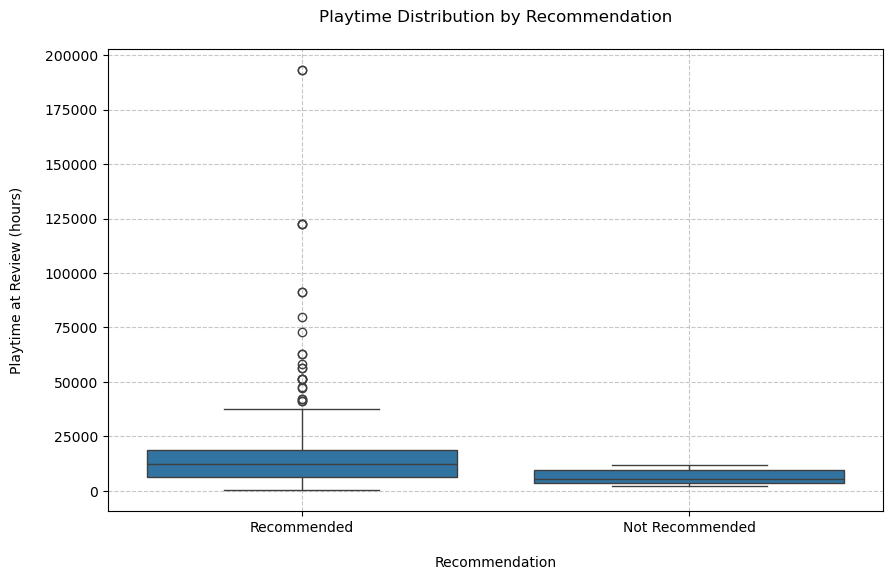

In [175]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommendation', y='Playtime At Review', data=df_copy)
plt.title('Playtime Distribution by Recommendation', pad=20)
plt.xlabel('Recommendation', labelpad=15)
plt.ylabel('Playtime at Review (hours)', labelpad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

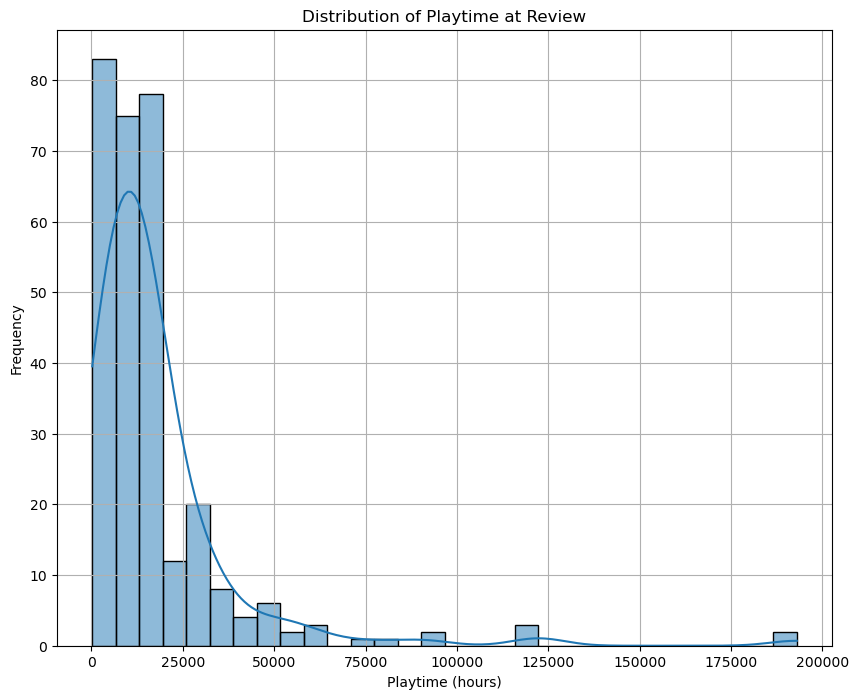

In [176]:
plt.figure(figsize=(10, 8))
sns.histplot(df_copy['Playtime At Review'], bins=30, kde=True)
plt.title('Distribution of Playtime at Review')
plt.xlabel('Playtime (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data Exporting

The processed data is exported to both Excel and CSV formats. This allows analysts to perform further analysis using spreadsheet software or import the data into other analytical tools.

In [178]:
# File names
csv_file = 'baldurs_gate_3_data.csv'
excel_file = 'baldurs_gate_3_data.xlsx'

# Export to CSV
try:
    df_copy.to_csv(csv_file, index=False)
    print(f"Data exported to {csv_file}")
except PermissionError as e:
    print(f"Permission error while writing to {csv_file}: {e}")

# Export to Excel
try:
    df_copy.to_excel(excel_file, index=False, sheet_name='Steam Reviews')
    print(f"Data exported to {excel_file}")
except PermissionError as e:
    print(f"Permission error while writing to {excel_file}: {e}")

Data exported to baldurs_gate_3_data.csv
Data exported to baldurs_gate_3_data.xlsx
